- '그리디 알고리즘'은 글로벌 최적(Global Optimum)을 찾기 위해 각 단계에서 로컬 최적(Local Optimum)을 선택하는<br/>
   휴리스틱 문제 해결 알고리즘이다.

In [1]:
## '그리디 알고리즘'(Greedy Algorithm)이란 바로 눈앞의 이익만을 좇는 알고리즘을 말한다.
## 대부분의 경우 뛰어난 결과를 도출하지 못하지만, 드물게 최적해를 보장하는 경우도 있다.

## 그리디 알고리즘은 최적화 문제를 대상으로 한다.
## 최적해를 찾을 수 있으면 그것을 목표로 삼고, 찾기 어려운 경우에는 주어진 시간 내에 나름 괜찮은 해를 찾는 것을 목표로 한다.

## 물론 대부분의 문제들은 이런 '로컬 최적해'(Locally Optimum Solution)를 찾는 greedy 방법으로는 문제를 해결할 수 없다.
## 그러나 합리적인 시간 내에 최적에 가까운 답을 찾을 수 있다는 점에서 매우 유용한 알고리즘이다.

In [2]:
## 그리디 알고리즘이 잘 작동하는 문제들은 '탐욕 선택 속성'(Greedy Choice Property)을 갖고 있는
## '최적 부분 구조'(Optimal Substructure)인 문제들이다.

## 여기서 '탐욕 선택 속성'이란 앞의 선택이 이후 선택에 영향을 주지 않는 것을 말한다.
## 다시 말해 그리티 알고리즘은 선택을 다시 고려하지 않는다는 의미이다.

## 그리고 '최적 부분 구조'란 문제의 최적 해결 방법이 부분 문제에 대한 최적 해결 방법으로 구성되는 경우를 말한다.

In [3]:
## 이렇게 2가지 조건을 만족하면 최적해를 찾을 수 있다.
## 하지만 조건을 만족하지 않더라도 그리디 알고리즘은 정답을 근사하게 찾는 용도로 활용할 수 있으며,
## 대부분의 경우 계산 속도가 빠르므로 매우 실용적이다.

In [4]:
## 그리디 알고리즘은 '최적 부분 구조' 문제를 푼다는 점에서 흔히 '다이나믹 프로그래밍'과 비교되는데,
## 서로 풀 수 있는 문제의 성격이 다르며 접근 방식 또한 다르다.

## 다이나믹 프로그래밍이 하위 문제에 대한 최적의 솔루션을 찾은 다음, 
## 이 결과들을 결합한 정보에 입각해 '전역 최적 솔루션'에 대한 선택을 한다면

## 그리디 알고리즘은 각 단계마다 '로컬 최적해'를 찾는 문제로 접근해
## 문제를 더 작게 줄여나가는 형태로, 서로 반대 방향으로 접근하는 구조를 띤다.

In [5]:
## 이제 그리디 알고리즘을 중심으로 풀 수 있는 문제, DP로 풀어야 하는 문제, 그리디로는 풀 수 없는 문제에 대해 살펴보자.

# 배낭 문제

In [6]:
## '배낭 문제'(Knapsack Problem)는 '조합 최적화'(Combinatorial Optimization) 분야의 매우 유명한 문제로,
## 그림 21-1과 같이 배낭에 담을 수 있는 무게의 최댓값(15kg)이 정해져 있고,
## 각각 짐의 가치($ 단위)와 무게(kg 단위)가 있는 짐들을 배낭에 넣을 때 
## 가치의 합이 최대가 되도록 짐을 고르는 방법을 찾는 문제다.

In [7]:
## 배낭 문제는 그림 21-1과 같이 짐을 쪼갤 수 있는 '분할 가능 배낭 문제'(Fractional Knapsack Problem)와
## 그림 23-5와 같이 짐을 쪼갤 수 없는 '0-1 배낭 문제'로 나뉜다.

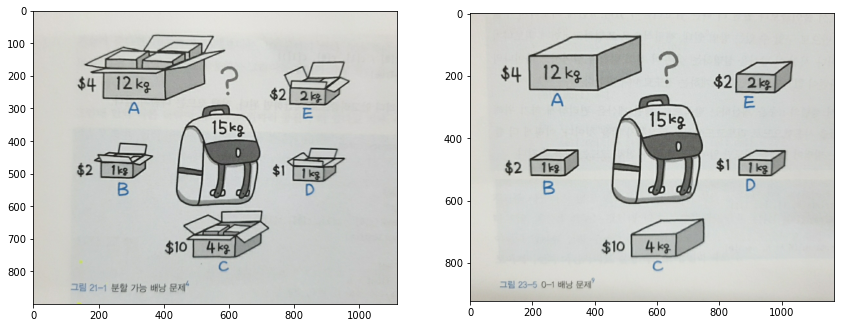

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,15))
columns = 4

images = ["그림21-1.jpg", "그림23-5.jpg"]

for i, path in enumerate(images):
    image = plt.imread(path)
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [9]:
## '분할 가능 배낭 문제'부터 풀어보자.

## 이 경우 단가가 가장 높은 짐부터 차례대로 채워나가면 되는데 C의 단가가 2.5 달러로 가장 높으므로 
## C, B, E, D 순으로 총 8kg의 짐을 배낭에 담고 마지막 남은 7kg을 위해 A의 7/12 만큼을 쪼개서 배낭에 담는다.
## 이렇게 하면 17.3$ 라는 최적해를 찾을 수 있다.

In [10]:
## 이를 코드로 구현하면 다음과 같다.

In [11]:
cargo = [
    (4, 12),
    (2, 1),
    (10, 4),
    (1, 1),
    (2, 2),
]

In [12]:
def fractional_knapsack(cargo):
    capacity = 15
    pack = []
    
    # 단가 계산 역순 정렬
    for c in cargo:
        pack.append((c[0] / c[1], c[0], c[1]))
    pack.sort(reverse=True)
    
    # 단가 순 그리디 계산
    total_value = 0
    
    for p in pack:
        if capacity - p[2] >= 0:
            capacity -= p[2]
            total_value += p[1]
        else:
            fraction = capacity / p[2]
            total_value += p[1] * fraction
            break
    
    return total_value

In [13]:
fractional_knapsack(cargo)

17.333333333333332

In [14]:
## 이 문제에서 만약 짐을 쪼갤 수 없다면 지금까지 실행한 방식대로 단가 순으로 배치해선 안 된다.
## 이와 같이 짐을 쪼갤 수 없는 '0-1 배낭 문제'는 23장에서 풀이해본다.

# 동전 바꾸기 문제

In [15]:
## 또 다른 유명한 문제로 '동전 바꾸기 문제'(Coin-Change Problem)가 있다.
## 동전의 액면이 10원, 50원, 100원처럼 증가하면서 이전 액면의 배수 이상이 되면 그리디 알고리즘으로 풀 수 있다.
## 우리나라 동전은 항상 배수 이상이므로 그리디로 풀 수 있다.

In [16]:
## 예를 들어 160원을 거슬러 준다면 10원짜리 16개보다는, 
## 100원짜리 1개, 50원짜리 1개, 10원짜리 1개로 각각의 동전을 최대한 활용하는 그리디한 방법이 
## 가장 작은 동전 개수로 거슬러줄 수 있는 방법이다.

In [17]:
## 그런데 만약 다른 나라에 갔더니 80원짜리 동전이 더 있다고 치자.
## 이 경우 더 이상 그리디하게 풀 수 없다. 160원을 거슬러줘야 한다면 80원짜리 2개가 정답인데 
## 그리디 알고리즘으로는 100원부터 선택하게 될 것이고 이렇게 하면 최적의 답을 낼 수 없기 때문이다.
## 이 경우 '0-1 배낭 문제'와 마찬가지로 다이나믹 프로그래밍으로 풀어야 한다.

# 가장 큰 합

In [18]:
## 세 번째로는, 그리디 알고리즘의 실패 사례를 살펴보자.
## 노드를 계속 더해가다가 마지막에 가장 큰 합이 되는 경로를 찾는 문제다.

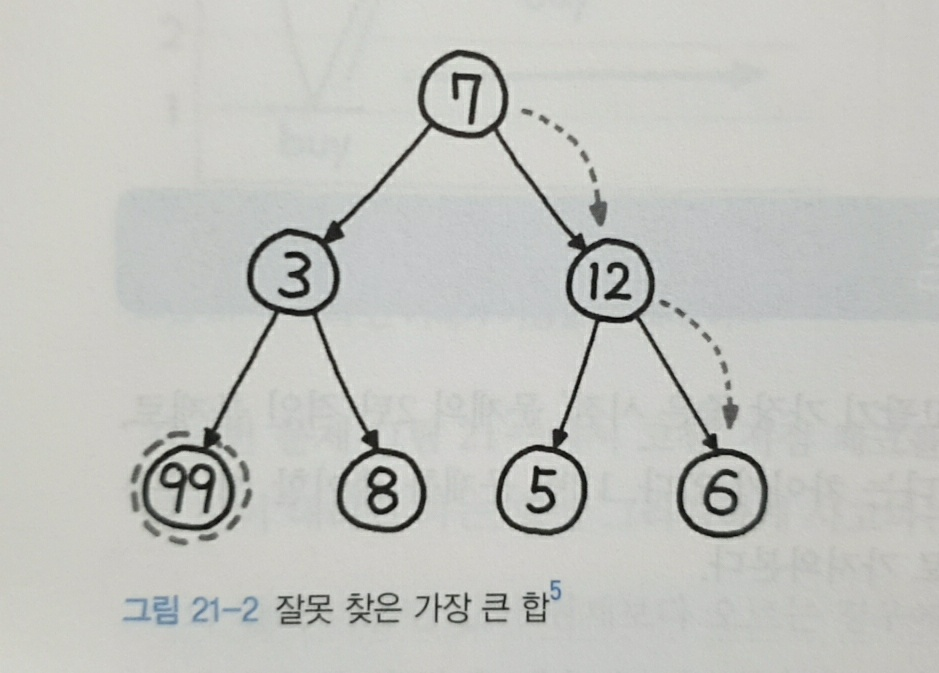

In [19]:
from IPython.display import Image

Image('그림21-2.jpg', width="300")

In [20]:
## 7부터 시작해 최종적으로 가장 큰 합을 만들기 위해서는 간선으로 연결된 2가지 선택지 중 더 큰 수를 계속 더하면 될 것 같다.
## 매번 가장 큰 값을 취해 나가면 7 -> 12 -> 6을 이어서 선택하면 된다.
## 그런데 이 경우 합은 25에 불과하다. 만약 3을 선택하고 99를 선택하면 무려 109가 될 수 있다.
## 그러나 그리디로는 99를 발견할 수 없다.
## 이 문제는 이진 트리를 정렬한다든지 등의 추가 작업을 하지 않는 한, 그리디로는 풀이할 수 없다.

# 78. 주식을 사고팔기 가장 좋은 시점 2

### LeetCode 122. Best Time to Buy and Sell Stock 2

##### 여러 번의 거래로 낼 수 있는 최대 이익을 산출하라

In [21]:
## 예제 1
    ## input: [7, 1, 5, 3, 6, 4]
    ## output: 7
    
    ## 설명: 1일 때 사서 5일 때 팔아 4의 이익을 얻고, 3일 때 사서 6일 때 팔아 3의 이익을 얻는다.
    ##       둘을 합하면 7이 된다.

##### 풀이 1 그리디 알고리즘

In [22]:
## 7장 '배열'에서 풀어본 12번 '주식을 사고팔기 가장 좋은 시점' 문제의 2탄 격인 문제로,
## 한 번이 아닌 여러 번의 거래를 할 수 있다는 차이가 있다.
## 12번 문제는 단 한 번의 거래였기 때문에 저점과 고점에만 체크를 했다.
## 그러나 이제는 여러 번 거래를 할 수 있다.
## 그렇다면 해법은 내리기 전에 팔고, 오르기 전에 사면 된다.
## 현실에서는 불가능하겠지만, 문제에서 주어지는 입력으로 등락 여부를 미리 알 수 있고 수수료도 없기 때문에 
## 몇 번이든 거래가 가능하다.
## 따라서 항상 이익을 내는 방향으로 몇 번이든 사고팔고를 반복하면 된다.
## '탐욕'이라는 의미에 잘 어울리는 그리디 알고리즘 문제라 할 수 있다.

In [23]:
## 계속 오르는 경우라도 몇 번이든 사고팔 수 있기 때문에, 
## 매번 단계마다 다음번 값이 오르면 이익을 취하는 형태로 구현하면 된다.

In [24]:
from typing import *

def maxProfit(prices: List[int]) -> int:
    result = 0
    
    for i in range(len(prices) - 1):
        if prices[i + 1] > prices[i]:
            result += prices[i + 1] - prices[i]
    
    return result

In [25]:
prices = [7, 1, 5, 3, 6, 4]

maxProfit(prices)

7

##### 풀이 2 파이썬다운 방식

In [26]:
def maxProfit(prices: List[int]) -> int:
    # 0보다 크면 무조건 합산
    return sum(max(prices[i + 1] - prices[i], 0) for i in range(len(prices) - 1))

In [27]:
prices = [7, 1, 5, 3, 6, 4]

maxProfit(prices)

7

In [28]:
## 이전 풀이에서 단계별로 값이 올랐는지 가격을 매번 비교하는 식으로 풀이했다.
## 그런데 곰곰이 생각해보면, 매번 이익을 계산해 0보다 크면 무조건 합산할 수 있다.

# 79. 키에 따른 대기열 재구성

### LeetCode 406. Queue Reconstruction by Height

```
여러 명의 사람들이 줄을 서 있다. 각각의 사람은 (h, k)의 두 정수 쌍을 갖는데,
h는 그 사람의 키, k는 앞에 줄 서 있는 사람들 중 자신의 키 이상인 사람의 수를 뜻한다.
이 값이 올바르도록 줄을 재정렬하는 알고리즘을 작성하라
```

In [29]:
## 예제 1
    ## input: [[7, 0], [4, 4], [7, 1], [5, 0], [6, 1], [5, 2]]
    ## output: [[5, 0], [7, 0], [5, 2], [6, 1], [4, 4], [7, 1]]

- 설명
   
    키가 5인 사람이 가장 먼저 섰고, 앞에는 아무도 없다. 7인 사람이 뒤따르고,<br/>
    그보다 키가 큰 사람은 아무도 없다. 다음으로 5인 사람이 섰으며, 앞에 5, 7 두 명이 자신보다 크거나 같다.<br/>
    6인 사람의 앞에는 자신보다 큰 키 7인 사람 한 명이 있다. 4인 사람 앞에는 5, 7, 5, 6 네 명이 있다.<br/>
    마지막으로 7인 사람 앞에 자신보다 크거나 같은 이는 키가 7인 사람 한 명이다.<br/>

##### 풀이 1 우선순위 큐 이용

In [30]:
## 문제를 잘 살펴보면 일정한 패턴이 엿보인다.
## 이 문제는 우선순위 큐를 이용하면 쉽게 풀 수 있다.
## 우선순위 큐 자체가 매번 그때그때의 최소 또는 최댓값을 추출하기 때문에,
## 그리디에 어울리는 대표적인 자료구조라 할 수 있다.

In [31]:
## 이 문제의 경우 우선순의 큐를 이용해 순서대로 예제 입력값을 추출해보면 다음과 같은 순서가 된다.

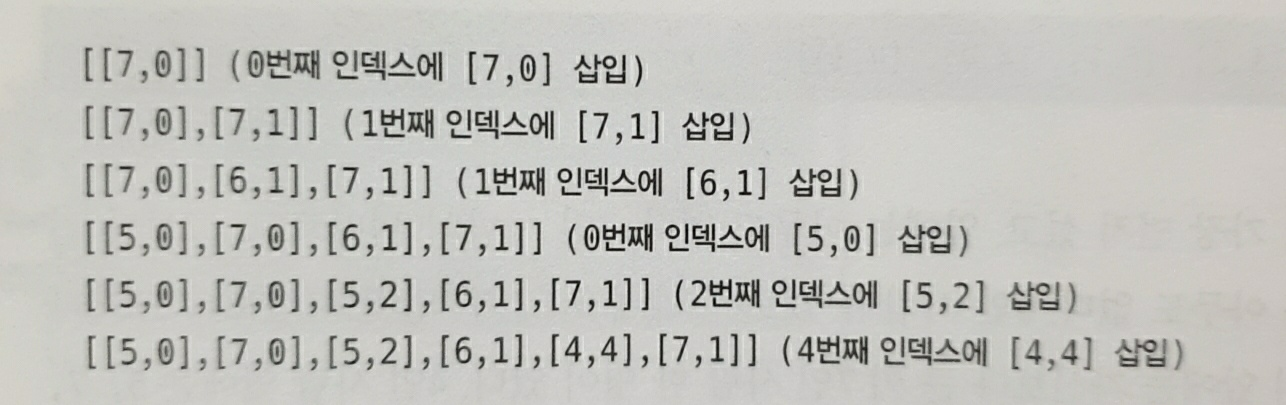

In [32]:
from IPython.display import Image

Image('problem_79_output_example.jpg', width="600")

In [33]:
## 첫 번째 값은 우선순위로 사용하고, 두 번째 값은 삽입되는 인덱스로 활용할 수 있다.
## 파이썬은 최소 힙만 지원하기 때문에, 첫 번째 값을 음수로 변경해 구현하면 될 것 같다.

In [34]:
import heapq

def reconstructQueue(people: List[List[int]]) -> List[List[int]]:
    heap = []
    
    # 키 역순, 인덱스 삽입
    for person in people:
        heapq.heappush(heap, (-person[0], person[1]))
        
    result = []
    
    # 키 역순, 인덱스 추출
    while heap:
        person = heapq.heappop(heap)
        result.insert(person[1], [-person[0], person[1]])
    
    return result

In [35]:
people = [[7, 0], [4, 4], [7, 1], [5, 0], [6, 1], [5, 2]]

reconstructQueue(people)

[[5, 0], [7, 0], [5, 2], [6, 1], [4, 4], [7, 1]]

# 80. 태스크 스케줄러

### LeetCode 621. Task Shceduler

```
A에서 Z로 표현된 태스크가 있다. 각 간격마다 CPU는 한 번의 태스크만 실행할 수 있고,
n번의 간격 내에는 동일한 태스크를 실행할 수 없다. 더 이상 태스크를 실행할 수 없는 경우
아이들(idle) 상태가 된다. 모든 태스크를 실행하기 위한 최소 간격을 출력하라.
```

In [36]:
## 예제 1
    ## input: ["A", "A", "A", "B", "B", "B"], n = 2
    ## output: 8

```
- 설명

    A -> B -> idle -> A -> B -> idle -> A -> B
```    

##### 풀이 1 우선순위 큐 활용

In [37]:
## 이 문제 또한 우선순위 큐를 이용해 그리디하게 풀 수 있는 문제다.

In [38]:
import collections

def leastInterval(tasks: List[str], n: int) -> int:
    counter = collections.Counter(tasks)
    result = 0
    
    while True:
        sub_count = 0
        
        # 개수 순 추출
        for task, _ in counter.most_common(n + 1):
            sub_count += 1
            result += 1
            
            counter.subtract(task)
            # 0 이하인 아이템을 목록에서 완전히 제거
            counter += collections.Counter()
            
        if not counter:
            break
        
        # idle 추가
        result += n - sub_count + 1
        
    return result
            

In [39]:
tasks = ["A", "A", "A", "B", "B", "B"]
n = 2

leastInterval(tasks, n)

8

In [40]:
## 이 문제의 전체 코드는 간단하지만 사실 여기에는 몇 가지 트릭이 있으며,
## 직관적으로 알아내기 어려운 부분들이 숨어 있다.

## 먼저, 우선순위 큐를 사용해 가장 개수가 많은 아이템부터 하나씩 추출해야 하는데,
## 문제는 전체를 추출하는 게 아니라 하나만 추출하고 빠진 개수를 업데이트 할 수 있는 구조가 필요하다는 것이다.

## 만약 heapq를 사용한다면 다음과 같은 형태가 될 것이다.

```python
for task, count in collections.Counter(tasks).items():
    heapq.heappush(heap, (-count, task))
    ...
    count, task = heapq.heappop(heap)
    ...
    heapq.heappush(heap, (-count + 1, task))
```

In [41]:
## 각 태스크의 개수를 Counter로 계산하고 이 값을 힙에 추가한다.
## heapq는 최소 힙만 지원하기 때문에 최대 힙 효과를 내기 위해 음수로 변환하여 저장한다.
## heappop()은 항목 자체가 추출되기 때문에 꺼내서 활용한 이후에는 다시 heappush()로 개수를 줄여 추가하는 작업이 필요하다.
## 이처럼 번거로운 작업들이 필요한데, Counter 만으로도 이 같은 일을 간결하게 처리할 수 있다.

```python
counter = collections.Counter(tasks)
for task, _ in counter.most_common():
    counter.subtract(task)
```

In [42]:
## most_common()은 가장 개수가 많은 아이템부터 출력하므로, 사실상 최대 힙과 같은 역할을 한다.
## 그러나 pop()처럼 추출되는 게 아니기 때문에 subtract(task)를 지정해 1개씩 개수를 줄여나간다.

## 그런데 Counter는 음수도 처리하는 특징이 있다.

In [43]:
s = ["A", "B", "C"]
counter = collections.Counter(s)
counter

Counter({'A': 1, 'B': 1, 'C': 1})

In [44]:
counter.subtract('A')

In [45]:
counter

Counter({'A': 0, 'B': 1, 'C': 1})

In [46]:
counter.subtract('A')

In [47]:
counter

Counter({'A': -1, 'B': 1, 'C': 1})

In [48]:
## 편리한 특징이지만 우리에게는 0 이하는 필요 없기 때문에,
## 매번 0인지 체크하거나 0 이하일 때는 아예 삭제하는 기능이 필요하다.
## 다음 코드가 그런 역할을 한다.

```python
counter.subtract(task)
couter += collections.Counter()
```

In [49]:
## 빈 collections.Counter()를 더하는 것인데, 이렇게 할 경우 0 이하인 아이템을 목록에서 제거한다.
## 매우 유용한 핵(Hack)이다. 
## 물론 실무에서라면 이렇게만 작성해두면 무슨 역할을 하는지 아무도 모를 것이므로 간단한 주석을 달아두는 게 좋다.

In [50]:
## 또 다른 트릭은 n과 관련된 내용이다.
## 만약 다음의 입력값을 most_common(n)으로 추출하고, 뒤에 idle을 덧붙이는 형태로 실행한다고 해보자.

```python
tasks = ["A", "A", "A", "B", "C", "D"], n = 2
```

In [51]:
## 이 입력값의 경우 실행 결과는 다음과 같을 것이다.

```
A -> B -> idle -> A -> C -> idle -> A -> D
```

In [52]:
## 결과는 8이다. 그러나 이는 정답이 아니다.
## 왜냐하면 다음 순서대로 실행할 경우 7로, 한 번 더 줄일 수 있기 때문이다.

```
A -> B -> idle -> A -> C -> D -> A
```

In [53]:
## 이 경우 마지막에는 순서가 다르게 나와야 하는데, 앞 부분과 달리 마지막에만 순서가 다르게 나오도록 하는 일은
## 별도의 예외 처리가 필요하다. 이 같은 처리를 구현하는 일은 생각보다 쉽지 않다.
## 별도의 처리 없이 한 번에 구현하는 방법은 없을까?

In [54]:
## n이 아닌 n + 1만큼을 추출해보자. 즉 most_common(n + 1)을 추출하고, n + 1개가 추출될 때는 idle 없이 실행한다.
## 결과는 다음과 같다.

```
A -> B -> C -> A -> D -> idle -> A
```

In [55]:
## 예제에서 n = 2였기 때문에 n + 1을 추출했을 때 3개가 모두 나온다면 idle 없이 계속 진행한다.(A -> B -> C)
## 그 다음에는 A -> D 2개만 추출됐기 때문에 한 번 idle 하고 마지막으로 A를 출력한다.
## 앞서와 순서는 달라졌지만 정답은 7로 동일하다.
## 이렇게 하면 별도의 예외 처리 없이도 쉽게 구현이 가능하다.
## n + 1 부분이 핵심이다.

# 81. 주유소

### LeetCode 134. Gas Station

```
원형으로 경로가 연결된 주유소 목록이 있다. 각 주유소는 gas[i]만큼의 기름을 갖고 있으며,
다음 주유소로 이동하는데 cost[i]가 필요하다. 기름이 부족하면 이동할 수 없다고 할 때
모든 주유소를 방문할 수 있는 출발점의 인덱스를 출력하라.

출발점이 존재하지 않을 경우 -1을 리턴하며, 출발점은 유일하다.
```

In [56]:
## 예제 1
    ## input: gas = [1, 2, 3, 4, 5], cost = [3, 4, 5, 1, 2]
    ## outpus: 3

```
- 설명

    3번 인덱스에서 출발할 경우는 다음과 같다.
    
    3번->4번 +4 -1 fuel 3
    4번->0번 +5 -2 fuel 6
    0번->1번 +1 -3 fuel 4
    1번->2번 +2 -4 fuel 2
    2번->3번 +3 -5 fuel 0
    
    정확하게 기름이 0까지 소모되며, 모든 주유소를 방문할 수 있다.
```    

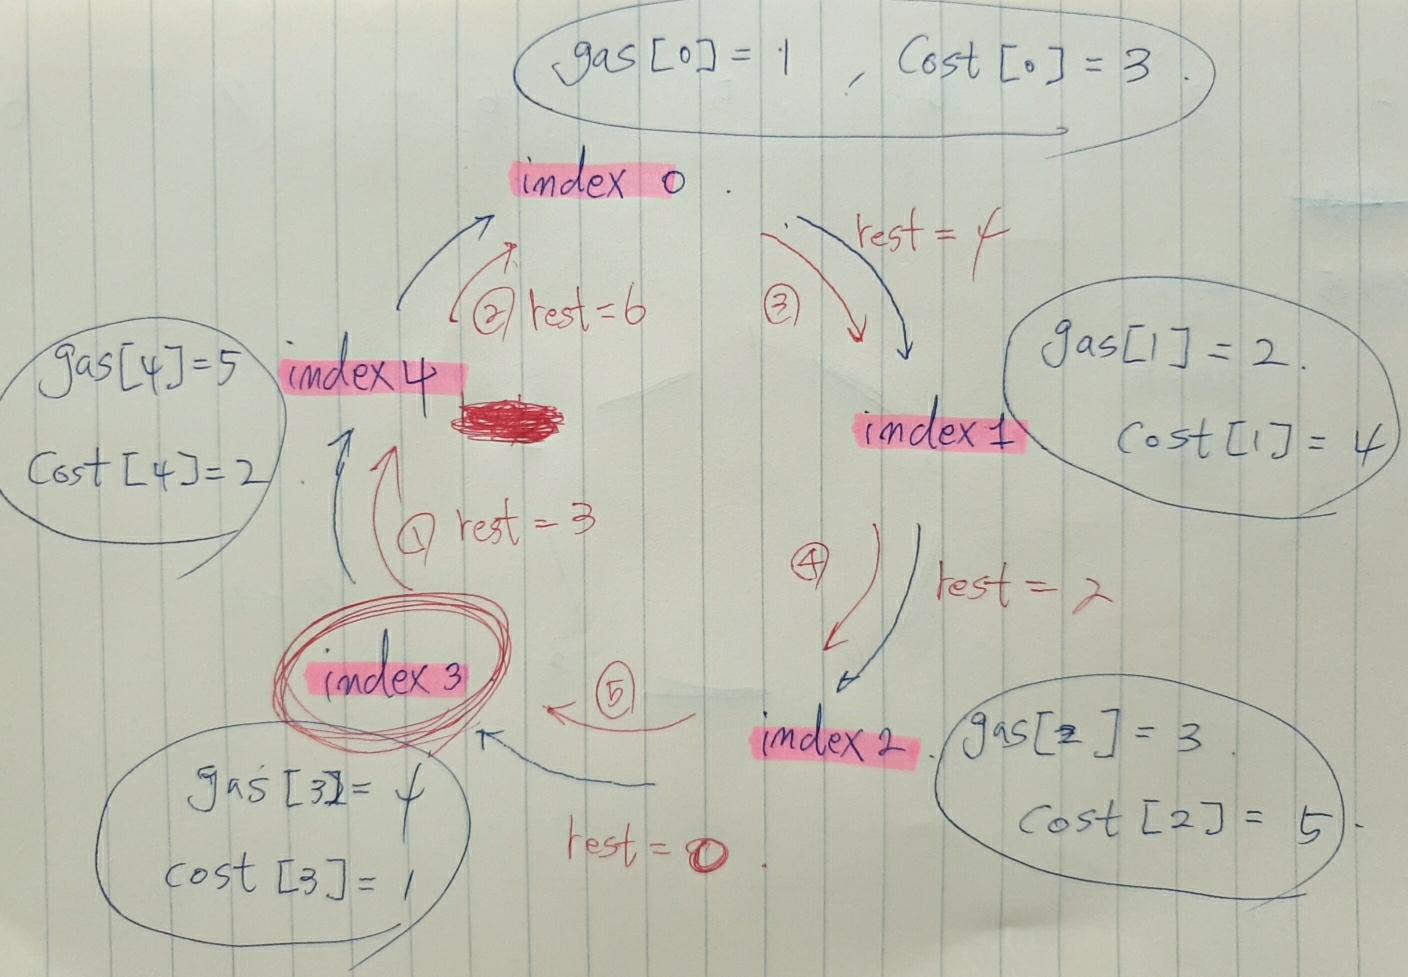

In [57]:
from IPython.display import Image

Image('problem_81_input_example.jpg', width="500")

##### 풀이 1 모두 방문

In [58]:
## 기름의 양 gas가 1부터 순서대로 되어 있어 헷갈릴 수 있는데, 
## 이 문제는 인덱스를 찾는 문제고 인덱스는 0부터 시작한다.

In [59]:
## 우선 처음부터 한 칸씩 출발점으로 지정하고, 나머지 모든 주유소를 방문하는 방법으로 풀이해보자.
## 주유소의 경로는 원형이므로, 모듈로 연산을 하여 인덱스를 다시 0부터 지정할 수 있게 한다.
## 그리고 모든 주유소를 방문 가능한지 점검하다가 이 문제에서는 출발점이 유일하다는 제약이 있기 때문에
## 가능할 경우 바로 해당 출발점을 리턴한다.
## 만약 중간에 경로가 끊길 경우 다시 다음번 출발점을 점검한다.

In [60]:
def canCompleteCircuit(gas: List[int], cost: List[int]) -> int:
    for start in range(len(gas)):
        fuel = 0
        for i in range(start, len(gas) + start):
            index = i % len(gas)
            print(f'start: {start}, i: {i}, index: {index}')
            can_travel = True
            if gas[index] + fuel < cost[index]:
                can_travel = False
                break
            else:
                fuel += gas[index] - cost[index]
        if can_travel:
            return start
    return -1

In [61]:
gas = [1, 2, 3, 4, 5]
cost = [3, 4, 5, 1, 2]

canCompleteCircuit(gas, cost)

start: 0, i: 0, index: 0
start: 1, i: 1, index: 1
start: 2, i: 2, index: 2
start: 3, i: 3, index: 3
start: 3, i: 4, index: 4
start: 3, i: 5, index: 0
start: 3, i: 6, index: 1
start: 3, i: 7, index: 2


3

In [62]:
## 두 번의 루프가 중첩되어 있으므로 O(n^2)이다. 
## 아울러 이 풀이는 실행 속도가 빠르지 않다. 겨우 풀리는 수준이다. 좀 더 최적화가 필요하다.

##### 풀이 2 한 번 방문

In [63]:
## 잘 생각해보면, 전체 기름의 양이 전체 비용보다 클 경우 반드시 전체를 방문할 수 있는 출발점이 존재한다.
## 원래는 여러 곳이 될 수 있겠지만 이 문제에서는 출발점이 유일하다는 제약이 있으므로,
## 반드시 한 군데만 존재하게 된다.

```python
if sum(gas) < sum(cost):
    return -1
```

In [64]:
## 이렇게 비용이 더 클 때 리턴해버리면, 반드시 존재하는 경우만 남게 된다.

## 따라서 전체를 방문하면서 성립되지 않는 지점은 출발점을 한 칸씩 뒤로 밀어낸다.
## 이렇게 성립되지 않는 지점을 제외하면, 가능한 지점은 제외하지 못한 지점이고,
## 자연스럽게 남은 곳이 정답이 된다.

In [65]:
def canCompleteCircuit(gas: List[int], cost: List[int]) -> int:
    # 모든 주유소 방문 가능 여부 판별
    if sum(gas) < sum(cost):
        return -1
    
    start, fuel = 0, 0
    
    for i in range(len(gas)):
        print(f'start: {start}, i: {i}')

        # 출발점이 안 되는 지점 판별
        if gas[i] + fuel < cost[i]:
            start = i + 1
            fuel = 0
        else:
            fuel += gas[i] - cost[i]
            
    return start
            

In [66]:
gas = [1, 2, 3, 4, 5]
cost = [3, 4, 5, 1, 2]

canCompleteCircuit(gas, cost)

start: 0, i: 0
start: 1, i: 1
start: 2, i: 2
start: 3, i: 3
start: 3, i: 4


3

In [67]:
## 두 번의 루프가 한 번으로 줄었다.
## 전체 sum()을 비교하는 구문을 통과했다면 반드시 출발점이 존재하는 경우고,
## 딱 한 군데만 존재하므로 한 번만 돌려서 확인하는 것으로 충분하다.
## O(n)으로 최적화했고 빠른 속도로 실행된다.
## 풀이 2가 1에 비해 80배 이상 빠른 속도로 실행된다. O(n)과 O(n^2)의 차이가 이렇게나 크다.

# 82. 쿠키 부여

### LeetCode 455. Assign Cookies

```
아이들에게 1개씩 쿠키를 나눠줘야 한다. 각 아이 child_i마다 그리드 팩터(Greed Factor) g_i를 갖고 있으며,
이는 아이가 만족하는 최소 쿠키의 크기를 말한다. 각 쿠키 cookie_j는 크기 s_j를 갖고 있으며,
s_j >= g_i이어야 아이가 만족하며 쿠키를 받는다. 최대 몇 명의 아이들에게 쿠키를 줄 수 있는지 출력하라
```

In [68]:
## 예제 1
    ## input: [1, 2, 3], [1, 1]
    ## output: 1
    
    ## 설명: 두 번째 아이부터는 크기 2이상의 쿠키가 필요하지만, 갖고 있는 최대 크기는 1이기 때문에 1명의 아이에게만 줄 수 있다.
    
## 예제 2
    ## input: [1, 2], [1, 2, 3]
    ## output: 2
    
    ## 설명: 충분한 쿠키를 갖고 있고, 2명 모두에게 쿠키를 줄 수 있다.

##### 풀이 1 그리디 알고리즘

In [69]:
## 이 문제는 그리디하게 배분하면 쉽게 풀 수 있는 문제다.
## 단, 예제에서는 모든 입력값이 정렬되어 있어 혼동될 수 있으나 원래 문제에는 정렬된 값이라는 조건이 주어지지 않았다.
## 따라서 먼저 정렬해주는 작업을 진행해야 한다.

In [70]:
def findContentChildren(g: List[int], s: List[int]) -> int:
    g.sort()
    s.sort()
    
    child_i = cookie_j = 0
    
    # 만족하지 못할 때까지 그리디 진행
    while child_i < len(g) and cookie_j < len(s):
        if s[cookie_j] >= g[child_i]:
            child_i += 1
        cookie_j += 1
        
    return child_i

##### 풀이 2 이진 검색

In [71]:
## 조금 다른 형태로 풀 수도 있다.
## 2개의 리스트를 모두 번갈아가며 탐색하는 게 아니라 하나의 리스트를 순회하면서 다른 하나는 이진 검색으로 찾는다.
## 그런 다음 찾아낸 인덱스가 현재 부여한 아이들보다 클 경우에는 더 줄 수 있다는 말이므로,
## 줄 수 있는 아이들의 수를 1명 더 늘린다.

In [72]:
def findContentChildren(g: List[int], s: List[int]) -> int:
    g.sort()
    s.sort()
    
    result = 0
    for i in s:
        # 이진 검색으로 더 큰 인덱스 탐색
        index = bisect.bisect_right(g, i)
        if index > result:
            result += 1
            
    return result

In [73]:
## 풀이 1과 2 모두 속도는 동일하다.